# 머신러닝 시작

### ADALINE 구현하기 - 클래스 기반

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine

In [38]:
class AdalineGD: # SGD : Stochastic Gradient Descent

    def __init__(self, eta, n_iter): # 초기화함수 : 객체 생성할 때 자동 호출
        self.eta = eta               # 가중치 갱신 비율, 학습률
        self.n_iter = n_iter         # 학습 반복 횟수
    
    def net_input(self, X):          # Net input function
        return np.dot(X, self.w[1:]) + self.w[0] # x1*w1 + x2*w2 + ... + xn*wn + b(=w0)

    def activation(self, X):         # Activation function
        return self.net_input(X)     # 항등함수 : 입력값 그대로 활성화 출력
    
    def predict(self, X):             # Quantizer
        output = self.activation(X)
        return np.where(output > 0, 1, -1)
    
    def fit(self, X, y):              # 훈련하는 함수
            self.w = np.zeros(X.shape[1] + 1)
            self.cost = []            # 오차 배열 만들기 (오차 로그용)

            for idx in np.arange(self.n_iter):      # 학습 반복 (에포크)
                output = self.activation(X)
                errors = y - output            # 오차 계산(실제값 - 출력값)
                delta = self.eta * X.T.dot(errors)  # 학습률 * 기울기(미분)
                    # X.T는 X를 트랜스포즈 행렬바꾸기, .dot은 행렬곱
                self.w[1:] += delta                 # 가중치 업데이트
                self.w[0] = self.eta * errors.sum() # 가중치(편향) 업데이트
                self.cost.append( (errors**2).sum() )  # **는 제곱

            return self     # w와 히스토리는 이미 클래스에 저장되어서 self만 반환하면 된다.


In [39]:
iris_dataset = load_iris()
X = iris_dataset['data']
y = iris_dataset['target']
y = np.where(y == 0, 1, -1)

In [75]:
model = AdalineGD(eta=0.00001, n_iter=5000)  # AdalineGD 인스턴스(객체) 만들기
model.fit(X, y)

In [76]:
model.w, model.cost[:10], model.cost[-10:]
# w : 맨 앞은 절편, 그 뒤부터 전부는 x특성에대한 가중치

(array([-9.32043689e-06,  6.98559777e-02,  3.48384548e-01, -4.30408067e-01,
        -1.52548394e-01]),
 [np.float64(150.0),
  np.float64(143.19044496617488),
  np.float64(137.5206548448522),
  np.float64(132.73750935843123),
  np.float64(128.6862487031217),
  np.float64(125.23917732114758),
  np.float64(122.2909942677699),
  np.float64(119.75486479742403),
  np.float64(117.55918117433586),
  np.float64(115.64489169231261)],
 [np.float64(13.08952066633066),
  np.float64(13.089483750202131),
  np.float64(13.089446842897788),
  np.float64(13.089409944415511),
  np.float64(13.089373054753182),
  np.float64(13.089336173908695),
  np.float64(13.089299301879933),
  np.float64(13.089262438664804),
  np.float64(13.089225584261179),
  np.float64(13.089188738666955)])

In [77]:
correct = []
for idx in range(X.shape[0]):       # 행의 갯수 (150개)
    pv = model.predict(X[idx])      # pv = predict value
    correct.append(pv == y[idx])    # 맞는 갯수만 저장

print("Accuracy : {0}".format( np.mean(correct) ) )

Accuracy : 1.0


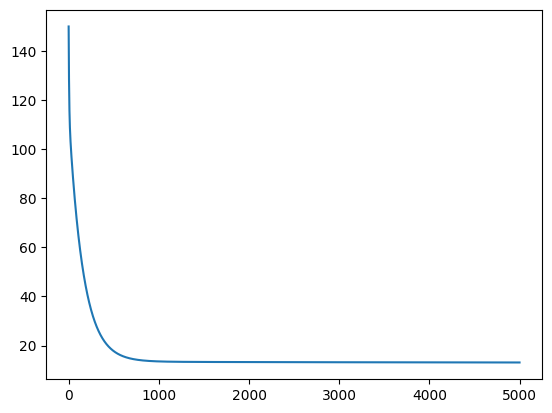

In [78]:
# 그래프 그리기
plt.plot(np.arange(len(model.cost)), model.cost)    # 손실이 얼마나 줄어드는지 확인
# plt.plot(np.arange(0, len(model.cost[-1000:])), model.cost[-1000:])
plt.show()